# Modification of time

In this section we will show you how to modify the timeslicing arrangement as well as change the time horizon and benchmark year intervals by modifying the ```settings.toml``` file.

## Modify timeslicing

Timeslicing is the division of a single benchmark year into multiple different sections. For example, we could slice the benchmark year into different seasons, make a distinction between weekday and weekend or a distinction between morning and night. We do this as energy demand profiles can show a difference between these timeslices. eg. Electricity consumption is lower during the night than during the day.

To achieve this, we have to modify the ```settings.toml``` file, as well as the files within the preset folder: ```Residential2020Consumption.csv``` and ```Residential2050Consumption.csv```. This is so that we can edit the demand for the residential sector for the new timeslices.

First we edit the ```settings.toml``` file to add two additional timeslices: early-morning and late-afternoon. We also rename afternoon to mid-afternoon. These settings can be found at the bottom of the `settings.toml` file.

An example of the changes is shown below:

    [timeslices]
    all-year.all-week.night = 1095
    all-year.all-week.morning = 1095
    all-year.all-week.mid-afternoon = 1095
    all-year.all-week.early-peak = 1095
    all-year.all-week.late-peak = 1095
    all-year.all-week.evening = 1095
    all-year.all-week.early-morning = 1095
    all-year.all-week.late-afternoon = 1095
    level_names = ["month", "day", "hour"]
    
The number of timeslices within this should add up to 8760; the number of hours in a benchmark year. Whilst this is required, MUSE does not double check this.
    
Next, we modify both Residential Consumption files. Again, we put the text in bold for the modified entries. We must add the demand for the two additional timelsices, which we call timeslice 7 and 8. We make the demand for heat to be 2 for both of the new timeslices.

Below is the modified ```Residential2020Consumption.csv``` file:
 
||RegionName|ProcessName|Timeslice|electricity|gas|heat|CO2f|wind|
|-|-|-|-|-|-|-|-|-|
|0|R1|gasboiler|1|0|0|1|0|0|
|1|R1|gasboiler|2|0|0|1.5|0|0|
|2|R1|gasboiler|3|0|0|1|0|0|
|3|R1|gasboiler|4|0|0|1.5|0|0|
|4|R1|gasboiler|5|0|0|3|0|0|
|5|R1|gasboiler|6|0|0|2|0|0|
|**6**|**R1**|**gasboiler**|**7**|**0**|**0**|**2**|**0**|**0**|
|**7**|**R1**|**gasboiler**|**8**|**0**|**0**|**2**|**0**|**0**|
|0|R2|gasboiler|1|0|0|1|0|0|
|1|R2|gasboiler|2|0|0|1.5|0|0|
|2|R2|gasboiler|3|0|0|1|0|0|
|3|R2|gasboiler|4|0|0|1.5|0|0|
|4|R2|gasboiler|5|0|0|3|0|0|
|5|R2|gasboiler|6|0|0|2|0|0|
|**6**|**R2**|**gasboiler**|**7**|**0**|**0**|**2**|**0**|**0**|
|**7**|**R2**|**gasboiler**|**8**|**0**|**0**|**2**|**0**|**0**|

The `ProcessName` must be reported, but it is not binding on the results. It is just the way that the model reads the input data.

We do the same for the ```Residential2050Consumption.csv```, however this time we make the demand for heat in 2050 to both be 5 for the new timeslices. See [here INSERT LINK HERE](github-residential2050) for the full file.
 
<!-- As we have modified the timeslicing arrangements there will be a change in the underlying demand for heating. This may require more electricity to service the demand for heat. Therefore, we relax the constraints for growth in ```windturbine``` in region `R2` in the ```technodata/power/technodata.csv``` file, as well as the constraints for ```heatpump```, again in region `R2`. For the full power sector ```technodata.csv``` file click [here INSERT LINK HERE](github-power-technodata), and for the full residential sector ```technodata.csv``` file click [here INSERT LINK HERE](github-residential-technodata). -->

Once the relevant files have been edited, we are able to run the simulation model using ```python -m muse settings.toml```.

Then, once run, we import the necessary packages:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

and visualise the relevant data:

gas sector:


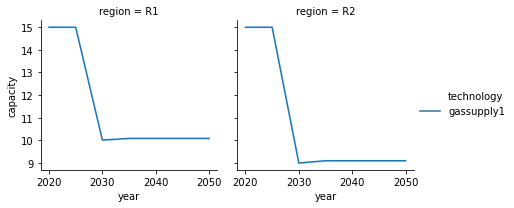

power sector:


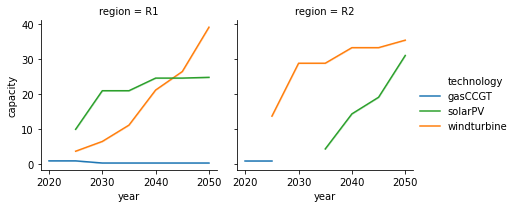

residential sector:


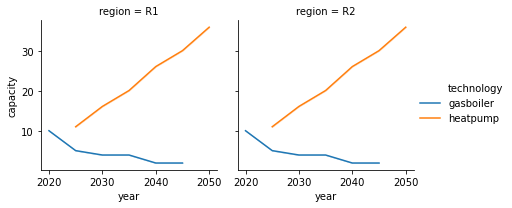

In [2]:
mca_capacity = pd.read_csv("../tutorial-code/4-modify-timing-data/1-modify-timeslices/Results/MCACapacity.csv")

for name, sector in mca_capacity.groupby("sector"):
    print("{} sector:".format(name))
    g = sns.FacetGrid(data=sector, col="region")
    g.map(sns.lineplot, "year", "capacity", "technology")
    g.add_legend()
    plt.show()
    plt.close()

Compared to the scenario where we added a [region](add-region.ipynb), there is a smaller increase in solarPV in region `R2` in the power sector. However, the rest remains largely unchanged. 

This example shows the trade-off between time granularity and speed of computation. This is due to the fact that as we add more timesteps, the model takes longer to run, but slightly different scenarios emerge. It is up to you to decide what level of granularity is required for your use case.

## Modify time horizon and time periods

For the previous examples, we have run the scenario from 2020 to 2050, in 5 year time steps per benchmark year. This has been set at the top of the ```settings.toml``` file. However, we may want to run a more detailed scenario, with 2 year time steps, and up until the year 2040.

Making this change is quite simple as we only have two lines to change. We will modify line 2 and 3 of the ```settings.toml``` file, as follows:

    # Global settings - most REQUIRED
    time_framework = [2020, 2022, 2024, 2026, 2028, 2030, 2032, 2034, 2036, 2038, 2040]
    foresight = 2   # Has to be a multiple of the minimum separation between the benchmark years 

The `time_framework` details each benchmark year in which we run the simulation. The ```foresight``` variable details how much foresight an agent has when making investments. 

As we have modified the timeslicing arrangements there will be a change in the underlying demand for heating. This may require more electricity to service this demand. Therefore, we relax the constraints for growth in the power sector for all technologies and constraints in the ```technodata/power/technodata.csv```, as shown below:

|ProcessName|RegionName|…|MaxCapacityAddition|MaxCapacityGrowth|TotalCapacityLimit|…|Agent1|
|-|-|-|-|-|-|-|-|
|Unit|-|…|PJ|%|PJ|…|New|
|gasCCGT|R1|…|**40**|**0.2**|**120**|…|0|
|windturbine|R1|…|**40**|**0.2**|**120**|…|0|
|solarPV|R1|…|**40**|**0.2**|**120**|…|0|
|gasCCGT|R2|…|**40**|**0.2**|**120**|…|0|
|windturbine|R2|…|**40**|**0.2**|**120**|…|0|
|solarPV|R2|…|**40**|**0.2**|**120**|…|0|
|...|...|...|...|...|...|...|...|

We also modify the constraints defined in the `technodata.csv` file for the residential sector, as shown below. We won't display the rows for 2040, however, these contain the same entries.

|ProcessName|RegionName|Time|…|MaxCapacityAddition|MaxCapacityGrowth|TotalCapacityLimit|…|Agent1|
|-|-|-|-|-|-|-|-|-|
|Unit|-|Year|…|PJ|%|PJ|…|New|
|gasboiler|R1|2020|…|**60**|**0.5**|**120**|…|0|
|heatpump|R1|2020|…|**60**|**0.5**|**120**|…|0|
|gasboiler|R2|2020|…|**60**|**0.5**|**120**|…|0|
|heatpump|R2|2020|…|**60**|**0.5**|**120**|…|0|
|...|...|...|...|...|...|...|...|...|

It must be noted, that this is a toy example. For modelling a real life scenario, data should be sought to ensure there remain realistic constriants.

For the full power sector ```technodata.csv``` file click [here INSERT LINK HERE](github-power-technodata), and for the full residential sector ```technodata.csv``` file click [here INSERT LINK HERE](github-residential-technodata).

<!-- Again, we run the simulation and ensure that the constraints allow for the demand to be met by modifying the `technodata.csv` files. See [here (INSERT LINK HERE)](github-horizon-periods) for the modified full example, including the `technodata.csv` files.
 -->


gas sector:


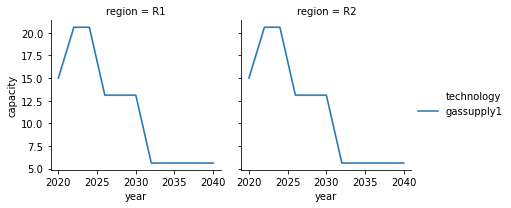

power sector:


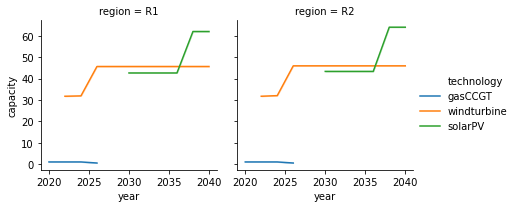

residential sector:


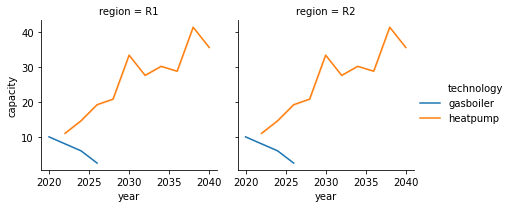

In [3]:
mca_capacity = pd.read_csv("../tutorial-code/4-modify-timing-data/2-modify-time-framework/Results/MCACapacity.csv")

for name, sector in mca_capacity.groupby("sector"):
    print("{} sector:".format(name))
    g = sns.FacetGrid(data=sector, col="region")
    g.map(sns.lineplot, "year", "capacity", "technology")
    g.add_legend()
    plt.show()
    plt.close()

Through the addition of more benchmark years, we are able to see a different scenario develop.

## Next steps 

In the next section we detail how to add an exogenous service demand, such as demand for heating or cooking.